In [1]:
from google.colab import files
uploaded = files.upload()


Saving fraud_medical_invoice_dataset.csv to fraud_medical_invoice_dataset (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fraud_medical_invoice_dataset.csv")

In [4]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient Name     100 non-null    object 
 1   Claim Amount     100 non-null    float64
 2   Diagnosis        100 non-null    object 
 3   Date of Service  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,Claim Amount
count,100.000000
mean,4401.848900
std,2782.465592
min,167.070000
25%,1979.205000
50%,4150.150000
75%,6578.815000
max,9900.750000


In [5]:
print(df.isnull().sum())

Patient Name       0
Claim Amount       0
Diagnosis          0
Date of Service    0
dtype: int64


In [6]:
df.fillna(method='ffill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17708\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
print("Duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate records: 0


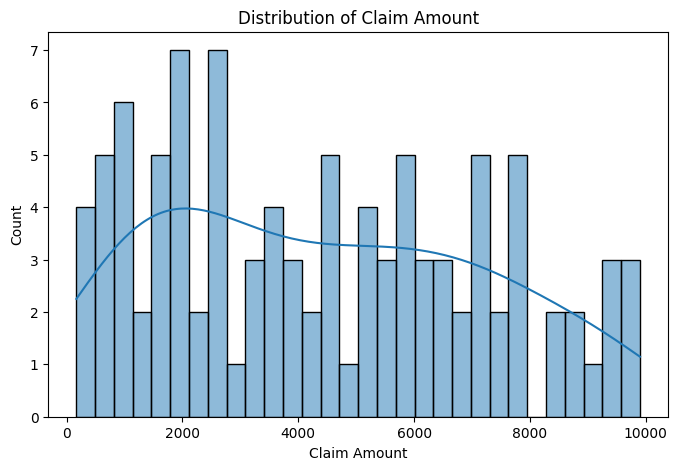

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Claim Amount'], bins=30, kde=True)
plt.title("Distribution of Claim Amount")
plt.show()

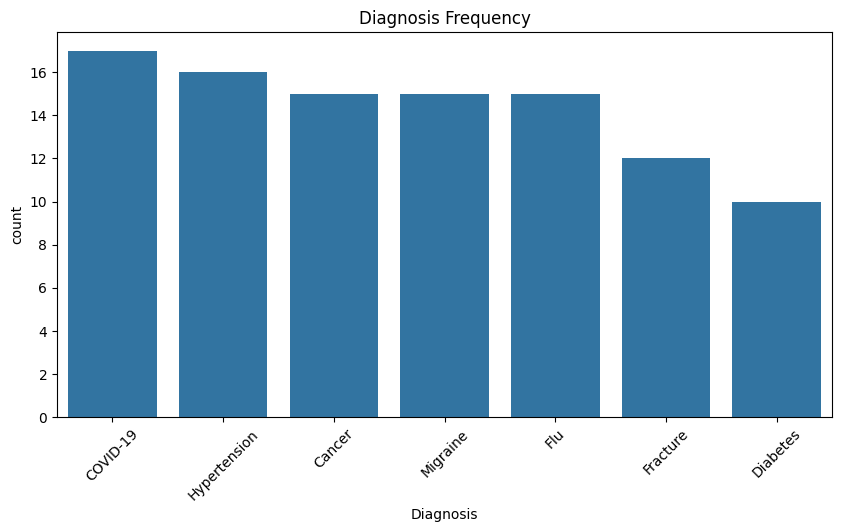

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Diagnosis'], order=df['Diagnosis'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Diagnosis Frequency")
plt.show()

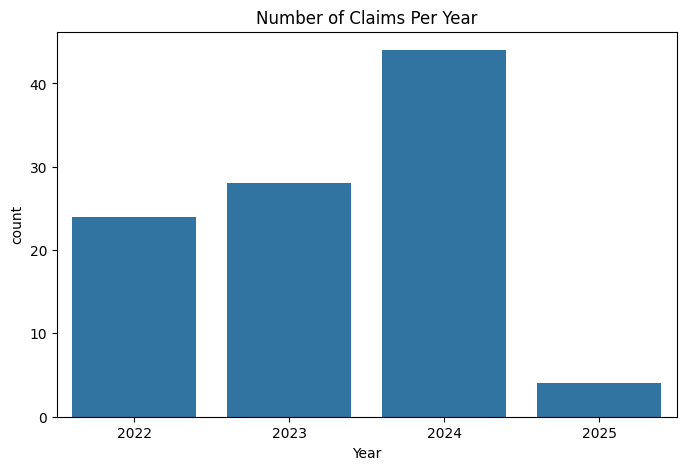

In [10]:
df['Date of Service'] = pd.to_datetime(df['Date of Service'])
df['Year'] = df['Date of Service'].dt.year

plt.figure(figsize=(8,5))
sns.countplot(x=df['Year'])
plt.title("Number of Claims Per Year")
plt.show()

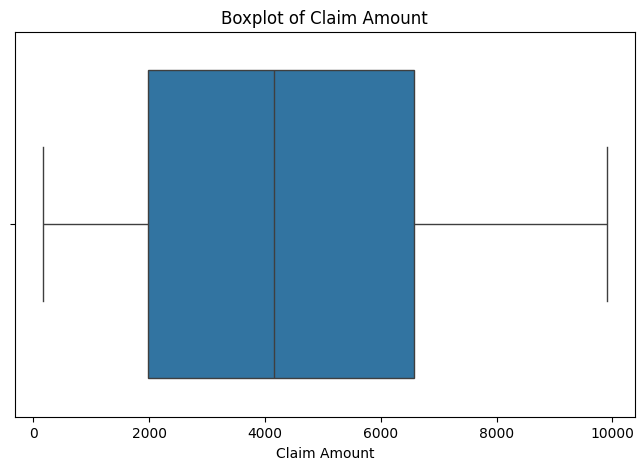

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Claim Amount'])
plt.title("Boxplot of Claim Amount")
plt.show()

In [12]:
Q1 = df['Claim Amount'].quantile(0.25)
Q3 = df['Claim Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Claim Amount'] >= lower_bound) & (df['Claim Amount'] <= upper_bound)]

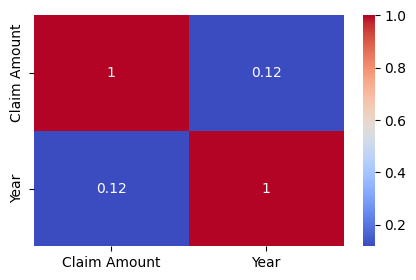

In [13]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
high_claims = df[df['Claim Amount'] > df['Claim Amount'].quantile(0.95)]
print(high_claims)

multiple_claims = df.groupby('Patient Name').size().sort_values(ascending=False)
print(multiple_claims[multiple_claims > 1])

        Patient Name  Claim Amount     Diagnosis Date of Service  Year
2   Kenneth Espinoza       9666.00        Cancer      2024-04-08  2024
19        Sara Adams       9900.75  Hypertension      2024-11-20  2024
66       Sarah Young       9368.61      COVID-19      2023-05-16  2023
75     Jordan Garcia       9366.99           Flu      2024-09-23  2024
77  Christine Benson       9790.66      Diabetes      2023-08-06  2023
Series([], dtype: int64)


In [15]:
df.to_csv("cleaned_fraud_medical_dataset.csv", index=False)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Load dataset
df = pd.read_csv("fraud_medical_invoice_dataset.csv")

# Convert categorical variables into numeric using Label Encoding
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

# Create a new column: Fraud Label (1 = Fraud, 0 = Valid)
df['Fraud'] = (df['Claim Amount'] > df['Claim Amount'].quantile(0.95)).astype(int)

# Split into features (X) and labels (y)
X = df[['Claim Amount', 'Diagnosis']]
y = df['Fraud']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



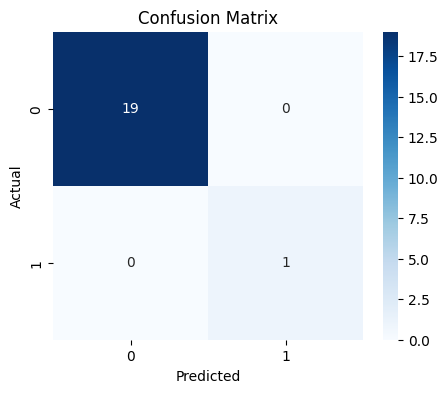

In [21]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# Example invoice
new_invoice = pd.DataFrame({
    'Claim Amount': [5000],
    'Diagnosis': label_encoder.transform(['Diabetes'])
})

# Predict fraud
prediction = model.predict(new_invoice)
print("Fraudulent" if prediction[0] == 1 else "Valid")

Valid


In [23]:
!pip install PyMuPDF pandas scikit-learn

  Using cached pymupdf-1.25.3-cp39-abi3-win_amd64.whl.metadata (3.4 kB)
Using cached pymupdf-1.25.3-cp39-abi3-win_amd64.whl (16.5 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import fitz

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text


pdf_filename =r"C:\Users\Lenovo\Documents\Arogya 2\backend\uploads\fraudulent_medical_invoice.pdf"
invoice_text = extract_text_from_pdf(pdf_filename)
print(invoice_text)

Medical Invoice
Patient Name: Shreya Chaudhari
Age: 30
Gender: Female
Insurance ID: INS-9988776655
Hospital Name: Sunrise City Hospital
Attending Doctor: Dr. Rahul Mehta
Diagnosis: Migraine Treatment
Date of Service: 2024-03-05
Billing Code: MIG-2024-999
Room Type: VIP Suite
Claim Amount: $28000
Payment Method: Wire Transfer
Services Rendered:
- MRI Scan - Brain
- Neurological Consultation
- Premium Pain Management Therapy
Notes: Claim submitted under emergency category, but no emergency recorded.




In [33]:
import re

def extract_invoice_details(text):
    patient_name = re.search(r'Patient Name:\s*(.+)', text)
    claim_amount = re.search(r'Claim Amount:\s*\$?(\d+)', text)
    diagnosis = re.search(r'Diagnosis:\s*(.+)', text)
    date_of_service = re.search(r'Date of Service:\s*(\d{4}-\d{2}-\d{2})', text)

    return {
        "Patient Name": patient_name.group(1) if patient_name else "Unknown",
        "Claim Amount": int(claim_amount.group(1)) if claim_amount else 0,
        "Diagnosis": diagnosis.group(1) if diagnosis else "Unknown",
        "Date of Service": date_of_service.group(1) if date_of_service else "Unknown"
    }

invoice_details = extract_invoice_details(invoice_text)
print(invoice_details)


{'Patient Name': 'Shreya Chaudhari', 'Claim Amount': 28000, 'Diagnosis': 'Migraine Treatment', 'Date of Service': '2024-03-05'}


In [35]:
import pandas as pd

if invoice_details['Diagnosis'] in label_encoder.classes_:
    diagnosis_encoded = label_encoder.transform([invoice_details['Diagnosis']])[0]
else:
    diagnosis_encoded = -1
invoice_df = pd.DataFrame([{
    'Claim Amount': invoice_details['Claim Amount'],
    'Diagnosis': diagnosis_encoded
}])


invoice_df = invoice_df[['Claim Amount', 'Diagnosis']]

prediction = model.predict(invoice_df)[0]

if prediction == 1:
    print("🚨 ALERT: The invoice is classified as **FRAUDULENT** ❌")
else:
    print("✅ The invoice is classified as **VALID** 👍")


🚨 ALERT: The invoice is classified as **FRAUDULENT** ❌
